In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [50]:
df=pd.read_csv("Cuisine_rating.csv")
df

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,175,"St. George,NY",Female,1982,Single,Professional,4,French,Never,Socially,1,2,1.5,No
196,197,170,"Upper West Side,NY",Female,2000,Married,Student,4,Chinese,Never,Often,1,2,1.5,No
197,198,160,"St. George,NY",Female,2006,Single,Professional,5,Japanese,Never,Often,5,2,3.5,No
198,199,130,"St. George,NY",Male,2002,Married,Student,3,Filipino,Never,Socially,3,2,2.5,No


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   User ID         200 non-null    int64  
 1   Area code       200 non-null    int64  
 2   Location        200 non-null    object 
 3   Gender          200 non-null    object 
 4   YOB             200 non-null    int64  
 5   Marital Status  200 non-null    object 
 6   Activity        200 non-null    object 
 7   Budget          200 non-null    int64  
 8   Cuisines        200 non-null    object 
 9   Alcohol         200 non-null    object 
 10  Smoker          200 non-null    object 
 11  Food Rating     200 non-null    int64  
 12  Service Rating  200 non-null    int64  
 13  Overall Rating  200 non-null    float64
 14  Often A S       200 non-null    object 
dtypes: float64(1), int64(6), object(8)
memory usage: 23.6+ KB


In [52]:
df.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T

,count,mean,std,min,0%,5%,50%,95%,99%,100%,max
User ID,200.0,100.500,57.879185,1.0,1.0,10.95,100.5,190.05,198.01,200.0,200.0
Area code,200.0,141.060,26.130257,101.0,101.0,107.00,135.0,188.20,198.00,199.0,199.0
YOB,200.0,1984.830,16.809339,1955.0,1955.0,1956.95,1987.0,2007.00,2009.00,2009.0,2009.0
Budget,200.0,3.815,1.056578,1.0,1.0,1.95,4.0,5.00,5.00,5.0,5.0
Food Rating,200.0,3.220,1.411226,1.0,1.0,1.00,3.0,5.00,5.00,5.0,5.0
Service Rating,200.0,3.230,1.526022,1.0,1.0,1.00,3.0,5.00,5.00,5.0,5.0
Overall Rating,200.0,3.225,1.079445,1.0,1.0,1.50,3.0,5.00,5.00,5.0,5.0


In [58]:
def grab_col_names(dataframe, cat_th=10,  car_th=20):
    """
    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.

    Parameters
    ----------
    dataframe: dataframe
    cat_th: int, float
        threshold value for categorical variables that are hidden in numerical variables
    car_th: int, float
        threshold value for cardinal variables that are hidden in categorical variables

    Returns
    -------
    cat_cols: list
        list of categorical variables
    num_cols: list
        list of numerical variables
    cat_but_car: list
        list of cardinal variables

    Notes
    ------
    cat_cols + num_cols + cat_but_car = total variable number
    num_but_cat is inside of cat_cols

    """
    for col in df.columns:
        if df[col].dtypes == "bool":
            df[col] = df[col].astype(int)
    # This part is importan to see the results in the graphs
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category", "object", "bool"]]

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < 10 and dataframe[col].dtypes in ["int", "float"]]

    cat_but_car = [col for col in dataframe.columns if
                   dataframe[col].nunique() > 20 and str(dataframe[col].dtypes) in ["category", "object"]]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["int", "float"]]
    num_cols = [col for col in num_cols if col not in cat_cols]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car
cat_cols, num_cols, cat_but_car = grab_col_names(df)
print(cat_cols)
Observations: 200

Observations: 200
Variables: 15
cat_cols: 9
num_cols: 0
cat_but_car: 0
num_but_cat: 1
['Location', 'Gender', 'Marital Status', 'Activity', 'Cuisines', 'Alcohol ', 'Smoker', 'Often A S', 'Overall Rating']


In [54]:
def cat_summary(df,col_name,plot=False):
    print(pd.DataFrame({col_name: df[col_name].value_counts(),
                        "Ratio": 100 * df[col_name].value_counts() / len(df)}))
    
    if plot:
        sn.countplot(df[col_name],data=df)
        plt.show(block=True)
        
    

                    Location  Ratio
St. George,NY             46   23.0
Upper East Side,NY        30   15.0
Riverdale,NY              28   14.0
Central Park,NY           24   12.0
China Town, NY            22   11.0
Market City, NY           20   10.0
Upper West Side,NY        18    9.0
Central Park,ny            8    4.0
Market City, MY            2    1.0
Cedar Hill, NY             2    1.0


C:\Users\Dell\anaconda3.1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


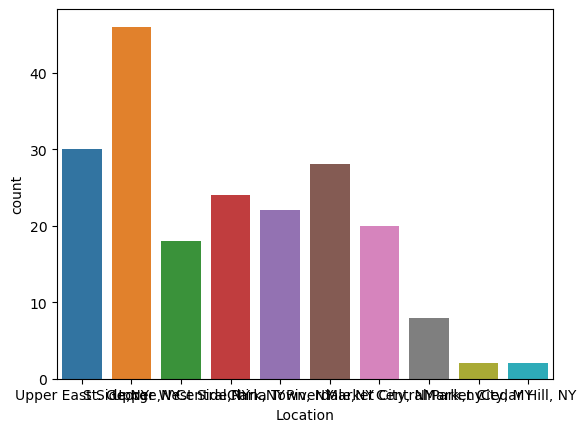

        Gender  Ratio
Male       118   59.0
Female      82   41.0


C:\Users\Dell\anaconda3.1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


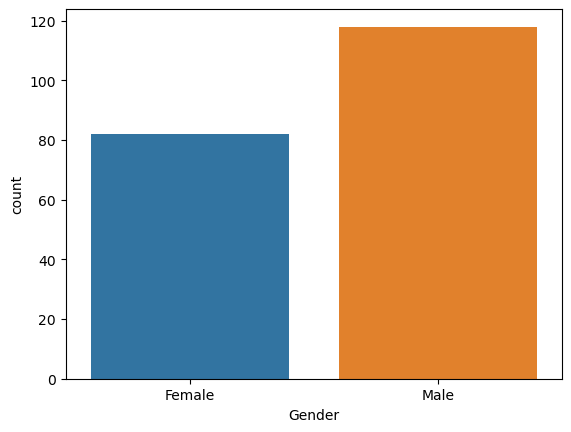

          Marital Status  Ratio
Single               100   50.0
Married               86   43.0
Divorced              14    7.0


C:\Users\Dell\anaconda3.1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


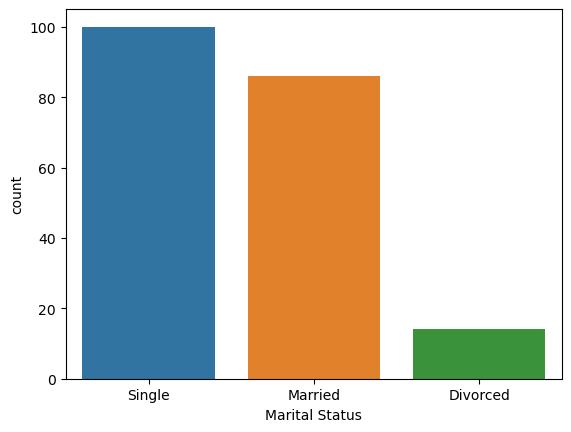

              Activity  Ratio
Student            120   60.0
Professional        80   40.0


C:\Users\Dell\anaconda3.1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


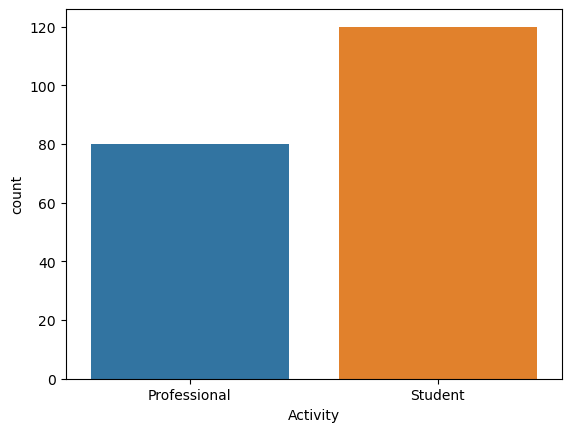

          Cuisines  Ratio
Japanese        36   18.0
Filipino        34   17.0
French          34   17.0
Indian          32   16.0
Chinese         24   12.0
Seafood         22   11.0
Italian         18    9.0


C:\Users\Dell\anaconda3.1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


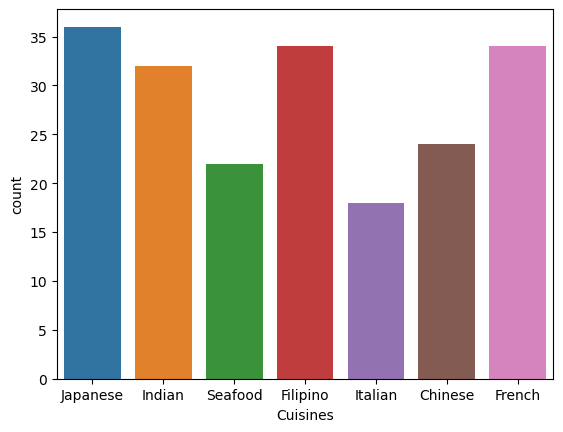

          Alcohol   Ratio
Never           88   44.0
Often           61   30.5
Socially        51   25.5


C:\Users\Dell\anaconda3.1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


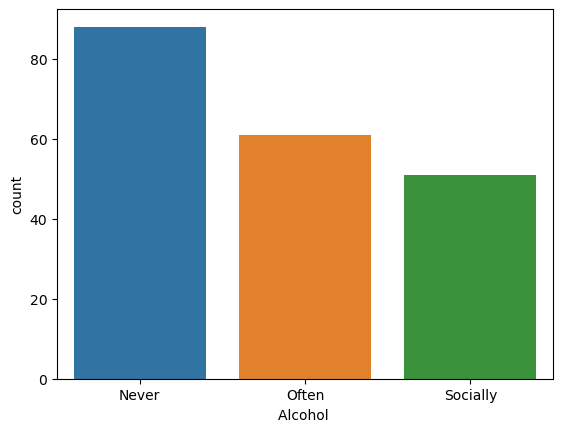

          Smoker  Ratio
Socially      71   35.5
Often         70   35.0
Never         59   29.5


C:\Users\Dell\anaconda3.1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


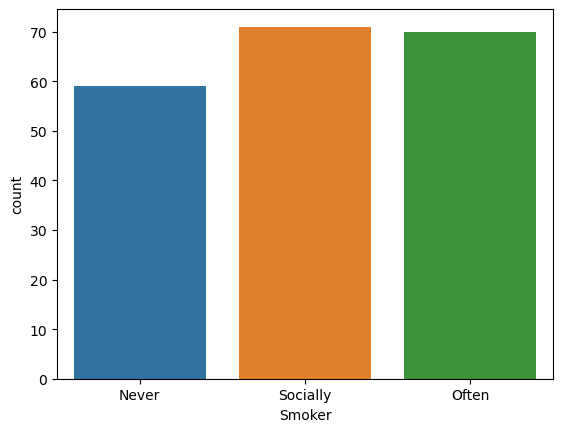

     Often A S  Ratio
No         174   87.0
Yes         26   13.0


C:\Users\Dell\anaconda3.1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


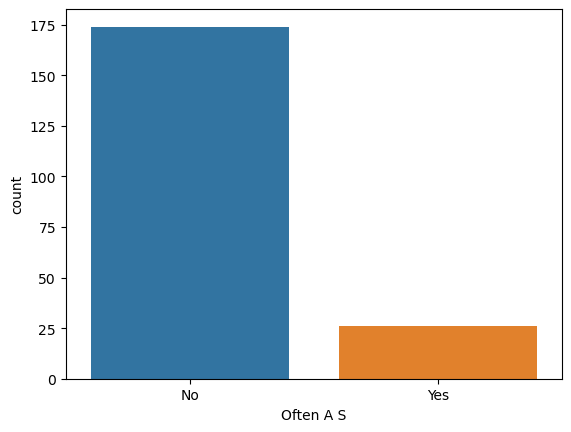

     Overall Rating  Ratio
3.5              35   17.5
3.0              34   17.0
2.5              32   16.0
5.0              29   14.5
4.0              26   13.0
2.0              21   10.5
1.5              11    5.5
4.5               6    3.0
1.0               6    3.0


C:\Users\Dell\anaconda3.1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


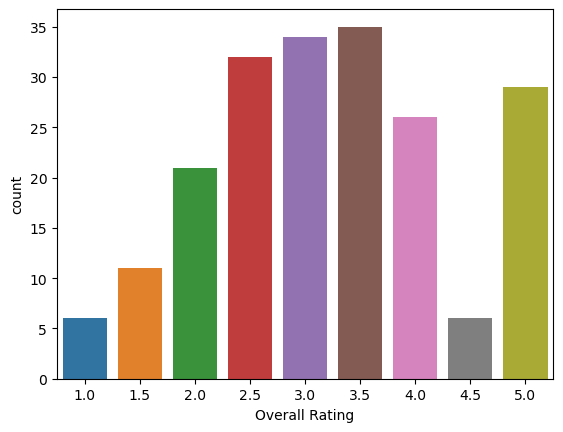

In [55]:
for col in cat_cols:
    cat_summary(df, col, plot=True)

In [47]:
num_col=[col for col in df.columns if df[col].dtypes in ["int","float"]]
num_col=[col for col in num_col if col not in cat_cols]
num_col

[]

In [59]:
num_cols = [col for col in df.columns if df[col].dtypes in ["int","float"]]
num_cols = [col for col in num_cols if col not in cat_cols]
num_cols

[]

dtype('float64')